# RQ1: Are Number of Reviews and Ratings an Indicator of Success?

### Part 1: How are Number of reviews and ratings related to a business’ popularity and its probability of failure?
- a) How do ratings relate to business popularity?
- b) How do number of reviews relate to probability of failure?
- c) How to ratings relate to probability of failure?
- d) How do ratings relate to lifespan of a business?

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import *
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
from matplotlib.lines import Line2D


module_path = os.path.abspath(os.path.join('../../data/..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
%matplotlib inline

Set style defaults

In [2]:
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_palette("muted")
sns.set_context("poster")

# Text, linees, and markers...
plt.rcParams['text.color'] = 'k'
plt.rcParams['axes.labelcolor'] = 'k'

plt.rcParams['axes.titlesize'] = 28
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 28
plt.rcParams['axes.labelweight'] = 'bold'

plt.rcParams['xtick.labelsize'] = 22
plt.rcParams['ytick.labelsize'] = 22

plt.rcParams['axes.grid'] = True

plt.rcParams['lines.markersize'] = 15
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['lines.linewidth'] = 2

plt.rcParams['legend.fontsize'] = 22

### Defining 'Popularity'

We've defined business 'popularity' as the level of checkins and reviews combined. Here, checkins and number of reviews has been weighted to produce an overall 'interactions' count that defines the popularity of the business.

In [3]:
df = pd.read_pickle('../../data/analysis/business_2_interactions.pkl')
df.head()

,business_id,name,city,state,stars,review_count,is_open,postal_code,categories,checkins,tipcount,interactionsWeighted
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",Ahwatukee,AZ,4.0,22,1,85044,Dentists;General Dentistry;Health & Medical;Or...,39.0,5.0,109.685216
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",McMurray,PA,3.0,11,1,15317,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...,15.0,1.0,46.415652
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",Phoenix,AZ,1.5,18,1,85017,Departments of Motor Vehicles;Public Services ...,6.0,0.0,53.123477
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",Tempe,AZ,3.0,9,0,85282,Sporting Goods;Shopping,120.0,3.0,151.415652
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",Cuyahoga Falls,OH,3.5,116,1,44221,American (New);Nightlife;Bars;Sandwiches;Ameri...,263.0,17.0,611.190138


## How do Star Ratings Relate to Business Popularity?
First off, let's see how many businesses we have in each star rating.

[Text(0,0,'1.0'),
 Text(0,0,'1.5'),
 Text(0,0,'2.0'),
 Text(0,0,'2.5'),
 Text(0,0,'3.0'),
 Text(0,0,'3.5'),
 Text(0,0,'4.0'),
 Text(0,0,'4.5'),
 Text(0,0,'5.0')]

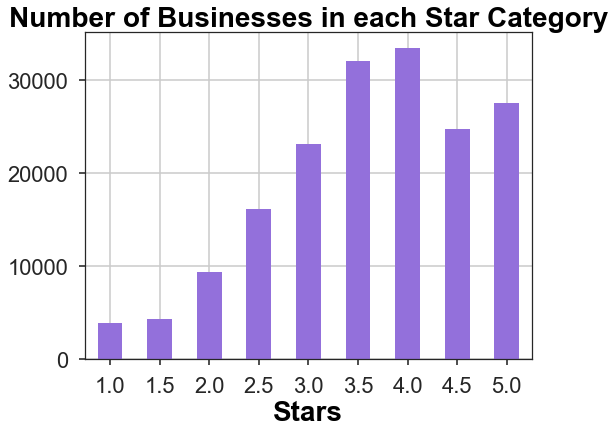

In [4]:
ratings = df.groupby('stars') #Group by rating; 1 star, 1.5, ... 4.5, 5

plt = ratings.size().plot(kind='bar', figsize=(8,6), color='mediumpurple')
plt.set_title("Number of Businesses in each Star Category")
plt.set_xlabel('Stars')
plt.set_ylabel('')
labels = [1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0]
plt.set_xticklabels(labels, rotation=0)

We can see here that we have ~33,000 businesses with 4.0 as a rating, the biggest group.
This is follwed by 3.5 stars with ~32,000 businesses. Followed suprisingly by 5.0, with ~27,500 businesses.
This is suspicious so let's look at the 5.0 category more.

Looking closer at this small number of reviews section, there are 8,000 businesses (nearly 30% of our 5 star businesses) have only 3 reviews.

[Text(0,0,'3'),
 Text(0,0,'4'),
 Text(0,0,'5'),
 Text(0,0,'6'),
 Text(0,0,'7'),
 Text(0,0,'8'),
 Text(0,0,'9'),
 Text(0,0,'10')]

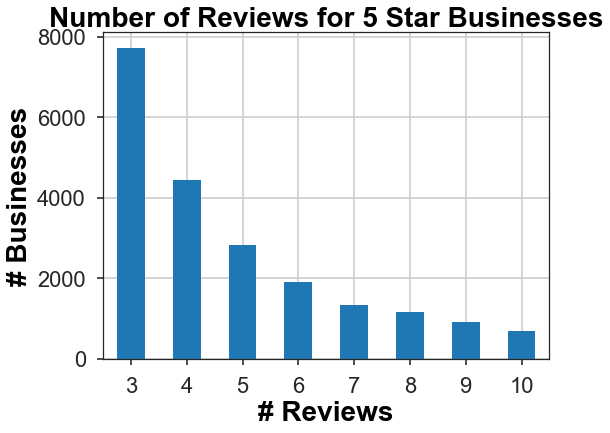

In [5]:
fiveMask = (df['stars'] == 5.0) & (df['review_count'] <= 10) #Choose only 5 stars and zoom in on those with less than 10 reviews
five = df[fiveMask]

plt = five.groupby('review_count')['business_id'].count().plot(kind='bar', figsize=(8,6), color='#1f77b4')
plt.set_title("Number of Reviews for 5 Star Businesses")
plt.set_xlabel("# Reviews")
plt.set_ylabel("# Businesses")
plt.set_xticklabels([3,4,5,6,7,8,9,10], rotation=0)

This graph below compares the average interactions for businesses within each star category. While we have a lot of 5 star businesses, Yelp users aren't interacting with them the most.

In fact, Yelp users interact with them almost the least, behind 1 star businesses.

[Text(0,0,'1.0'),
 Text(0,0,'1.5'),
 Text(0,0,'2.0'),
 Text(0,0,'2.5'),
 Text(0,0,'3.0'),
 Text(0,0,'3.5'),
 Text(0,0,'4.0'),
 Text(0,0,'4.5'),
 Text(0,0,'5.0')]

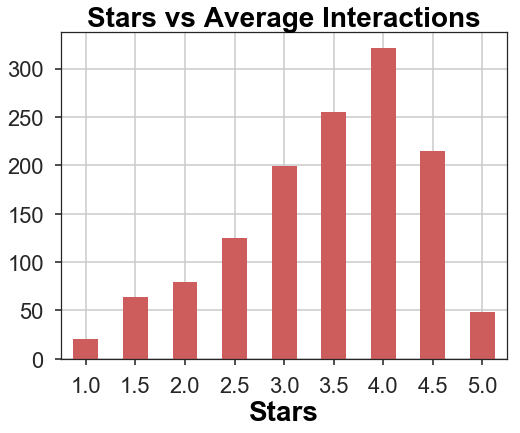

In [6]:
ratings = df.groupby('stars')

plt = ratings['interactionsWeighted'].mean().plot(kind='bar', color = 'indianred', figsize=(8,6))
plt.set_title("Stars vs Average Interactions")
plt.set_ylabel('')
plt.set_xlabel('Stars')
labels = [1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0]
plt.set_xticklabels(labels,rotation=0)


- There are a lot of 5 star businesses to interact with (27000!) but Yelp users don't interact with them much. They aren't checking in or leaving reviews and tips for them often compared to other businesses.
- Nearly 30% of our 5 star businesses have only 3 reviews.

## How do Number of Reviews Relate to Probability of Failure?

99% of our businesses have < 738 reviews:

In [7]:
revNum = df.copy()

#organise number of reviews into 10 groups and make a column to represent it
intervalGroups = pd.cut(revNum['review_count'], 10)
revNum['range'] = pd.Series(intervalGroups, index=revNum.index)

#get % for each group
groups = revNum.groupby('range')
pctReviews = groups.size()*100 / len(revNum) #Calcuate percentage of our businesses that are in each category
pctRev = pd.DataFrame(pctReviews)
pctRev = pctRev.reset_index()
pctRev.columns = (["Number of Reviews", "% Businesses"])
pctRev

,Number of Reviews,% Businesses
0,"(-4.358, 738.8]",99.734199
1,"(738.8, 1474.6]",0.201642
2,"(1474.6, 2210.4]",0.035516
3,"(2210.4, 2946.2]",0.016040
4,"(2946.2, 3682.0]",0.005156
5,"(3682.0, 4417.8]",0.004010
6,"(4417.8, 5153.6]",0.001146
7,"(5153.6, 5889.4]",0.000573
8,"(5889.4, 6625.2]",0.000573
9,"(6625.2, 7361.0]",0.001146


Make new groups for within the 0-740 range

In [8]:
u700 = revNum[revNum['review_count'] < 740].copy() #Take only the businesses with less than 740

#organise the businesses with 0-740 reviews into groups and make a column
u700Groups = pd.cut(u700['review_count'], 6)
u700['range'] = pd.Series(u700Groups, index=u700.index)
u700.head()

,business_id,name,city,state,stars,review_count,is_open,postal_code,categories,checkins,tipcount,interactionsWeighted,range
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",Ahwatukee,AZ,4.0,22,1,85044,Dentists;General Dentistry;Health & Medical;Or...,39.0,5.0,109.685216,"(2.264, 125.667]"
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",McMurray,PA,3.0,11,1,15317,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...,15.0,1.0,46.415652,"(2.264, 125.667]"
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",Phoenix,AZ,1.5,18,1,85017,Departments of Motor Vehicles;Public Services ...,6.0,0.0,53.123477,"(2.264, 125.667]"
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",Tempe,AZ,3.0,9,0,85282,Sporting Goods;Shopping,120.0,3.0,151.415652,"(2.264, 125.667]"
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",Cuyahoga Falls,OH,3.5,116,1,44221,American (New);Nightlife;Bars;Sandwiches;Ameri...,263.0,17.0,611.190138,"(2.264, 125.667]"


We can see from the cell below that with more reviews, there are less closures. 

For the businesses with >615 reviews, only 4% of them are closed.

Text(0.5,1,'% Closed by Review Count Group')

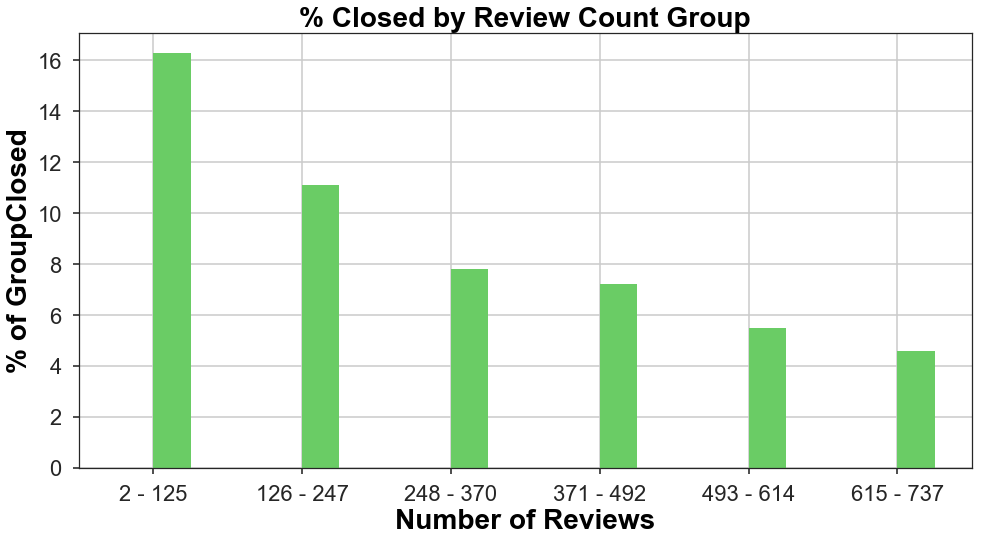

In [9]:
u700pct = u700.groupby(['range', 'is_open']).agg({'business_id': 'size'}) #get number of businesses in each range (open vs closed)
u700_pcts = u700pct.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())) #calculate % of total within range

u700df = u700_pcts.reset_index() # reset index so we can choose the is_open column
u700close = u700df[u700df['is_open'] == 0] # choose only closed businesses

#Plot
plt = u700close.plot(kind='bar', legend=False, figsize=(16,8))
labels = ["2 - 125", "126 - 247", "248 - 370", "371 - 492", "493 - 614", "615 - 737"]
plt.set_xticklabels(labels,rotation=0)
plt.set_ylabel('% of GroupClosed')
plt.set_xlabel('Number of Reviews')
plt.set_title("% Closed by Review Count Group")

However, this may not show the full story as it's probable that businesses with more reviews have been open longer. This can be seen in the following analysis:

This dataframe gives information about each review for a business and it's lifespan.

In [10]:
revInfo = pd.read_pickle('../../data/prep/reviewInfo.pkl')
revInfo.head()

,name,stars,city,state,postal_code,review_count,is_open,lastReview,firstReview,lifespan
--6MefnULPED_I942VcFNA,"""John's Chinese BBQ Restaurant""",3.0,Richmond Hill,ON,L4B 3P7,37,1,2017-12-04,2008-08-07,3406
--7zmmkVg-IMGaXbuVd0SQ,"""Primal Brewery""",4.0,Huntersville,NC,28078,47,1,2017-11-12,2014-12-30,1048
--8LPVSo5i0Oo61X01sV9A,"""Valley Bone and Joint Specialists""",4.5,Gilbert,AZ,85234,3,1,2017-06-28,2014-05-15,1140
--9QQLMTbFzLJ_oT-ON3Xw,"""Great Clips""",3.5,Tempe,AZ,85283,11,1,2017-05-02,2013-05-15,1448
--9e1ONYQuAa-CB_Rrw7Tw,"""Delmonico Steakhouse""",4.0,Las Vegas,NV,89109,1451,1,2017-12-11,2005-04-27,4611


Split businesses under 740 reviews into groups and make a column to represent given group.

In [11]:
#imports needed here despite being imported above
import matplotlib
from matplotlib import *
import matplotlib.pyplot as plt

u740 = revInfo[revInfo['review_count'] < 740].copy() #get all businesses < 740 reviews
reviewcount_groups = pd.cut(u740['review_count'], 6) #split into 6 groups
u740['range'] = pd.Series(reviewcount_groups, index=u740.index) #vreate column to represnet groups
u740 =u740.reset_index() #reset index so we can access columns
revCount = u740.groupby('range') #group by range to access later
u740.head()

,index,name,stars,city,state,postal_code,review_count,is_open,lastReview,firstReview,lifespan,range
0,--6MefnULPED_I942VcFNA,"""John's Chinese BBQ Restaurant""",3.0,Richmond Hill,ON,L4B 3P7,37,1,2017-12-04,2008-08-07,3406,"(2.264, 125.667]"
1,--7zmmkVg-IMGaXbuVd0SQ,"""Primal Brewery""",4.0,Huntersville,NC,28078,47,1,2017-11-12,2014-12-30,1048,"(2.264, 125.667]"
2,--8LPVSo5i0Oo61X01sV9A,"""Valley Bone and Joint Specialists""",4.5,Gilbert,AZ,85234,3,1,2017-06-28,2014-05-15,1140,"(2.264, 125.667]"
3,--9QQLMTbFzLJ_oT-ON3Xw,"""Great Clips""",3.5,Tempe,AZ,85283,11,1,2017-05-02,2013-05-15,1448,"(2.264, 125.667]"
4,--DaPTJW3-tB1vP-PfdTEg,"""Sunnyside Grill""",3.5,Toronto,ON,M6E,39,1,2017-12-02,2012-06-04,2007,"(2.264, 125.667]"


The frame below shows the % of businesses within each range that are open and closed. For example, the first shows that 16% of the businesses in the 2.264 - 125.667 range are closed, and 83% are open.

In [12]:
rcPcts = u740.groupby(['range', 'is_open']).agg({'index': 'size'}) #aggregate by business size
rc_pcts = rcPcts.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())) #calculate percentage open/closed
rc_pcts

index
range              is_open           
(2.264, 125.667]   0        16.267549
                   1        83.732451
(125.667, 248.333] 0        11.101784
                   1        88.898216
(248.333, 371.0]   0         7.796610
                   1        92.203390
(371.0, 493.667]   0         7.198748
                   1        92.801252
(493.667, 616.333] 0         5.501618
                   1        94.498382
(616.333, 739.0]   0         4.597701
                   1        95.402299

The frame below shows just the % of closed businesses within each range.

In [13]:
lifeFrame = rc_pcts.reset_index() #reset index so we can access columns
rcPctsClose = lifeFrame[lifeFrame['is_open'] == 0] #get only closed businesses
rcPctsClose.columns=(['range', 'is_open', '% businesses in range'])
rcPctsClose

,range,is_open,% businesses in range
0,"(2.264, 125.667]",0,16.267549
2,"(125.667, 248.333]",0,11.101784
4,"(248.333, 371.0]",0,7.796610
6,"(371.0, 493.667]",0,7.198748
8,"(493.667, 616.333]",0,5.501618
10,"(616.333, 739.0]",0,4.597701


This graph shows the same % closure graph as above, but as we can see with the red line the lifespan increases with number of reviews. This means that the businesses have just been accumulating reviews over time, and does not mean they have been attracting reviews due to the quality of their business.

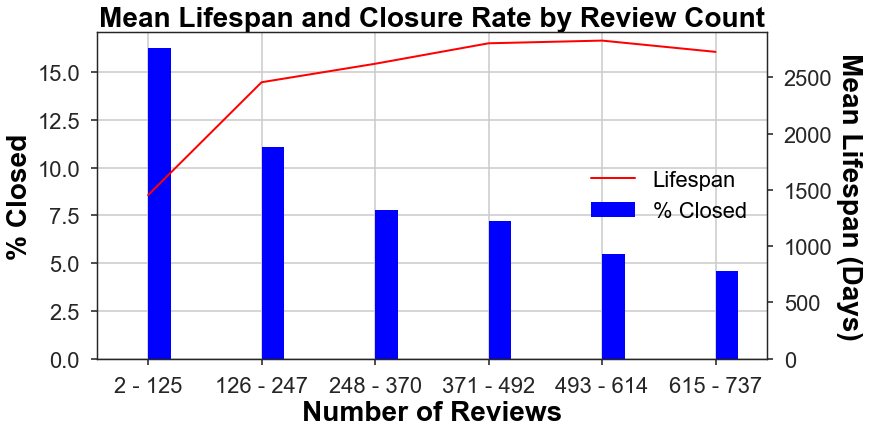

In [14]:
plt.rcParams["figure.figsize"] = (12,6) #set size

fig = plt.figure() 

ax = fig.add_subplot(111)
ax2 = ax.twinx() #creating 2 axes on same plot

revCount['lifespan'].mean().plot(color='red', ax=ax2,legend=False) #make lifespan line
rcPctsClose.plot(kind='bar', color='blue', ax=ax, width=0.4, legend=False) #make bars

ax2.set_ylabel('Mean Lifespan (Days)', rotation = 270, labelpad=30)
ax.set_ylabel('% Closed')

labels = ["2 - 125", "126 - 247", "248 - 370", "371 - 492", "493 - 614", "615 - 737"]
ax.set_xticklabels(labels,rotation=0)
ax.set_xlabel('Number of Reviews')
ax2.set_ylim(0,2900)

#Custom legend and fixing grid
legend_elements = [Line2D([0], [0], color='r', lw=2, label='Lifespan'), Patch(facecolor='blue', label='% Closed')]
ax.legend(handles=legend_elements, loc='center right')
ax2.grid(False)
ax.set_title("Mean Lifespan and Closure Rate by Review Count")


plt.show()

To tackle this problem, we've organised the businesses by the *rate* of reviews. They are grouped by their "reviews per day", which is calculated by its total reviews divided by it's lifespan.

In [15]:
#rpd (reviews per day) will caluclate number of reviews divided by lifespan.
def rpd(a, b):
    if a > 0 and b > 0:
        revPerDay = float(a/b)
        return revPerDay
    else: 
        return a

#Make a column to represent a businesses reviews per day.
revInfo['rpd'] = revInfo.apply(lambda row: rpd(row['review_count'], row['lifespan']), axis=1) #calculate review per day
revInfo.head()

,name,stars,city,state,postal_code,review_count,is_open,lastReview,firstReview,lifespan,rpd
--6MefnULPED_I942VcFNA,"""John's Chinese BBQ Restaurant""",3.0,Richmond Hill,ON,L4B 3P7,37,1,2017-12-04,2008-08-07,3406,0.010863
--7zmmkVg-IMGaXbuVd0SQ,"""Primal Brewery""",4.0,Huntersville,NC,28078,47,1,2017-11-12,2014-12-30,1048,0.044847
--8LPVSo5i0Oo61X01sV9A,"""Valley Bone and Joint Specialists""",4.5,Gilbert,AZ,85234,3,1,2017-06-28,2014-05-15,1140,0.002632
--9QQLMTbFzLJ_oT-ON3Xw,"""Great Clips""",3.5,Tempe,AZ,85283,11,1,2017-05-02,2013-05-15,1448,0.007597
--9e1ONYQuAa-CB_Rrw7Tw,"""Delmonico Steakhouse""",4.0,Las Vegas,NV,89109,1451,1,2017-12-11,2005-04-27,4611,0.314682


We can see here that 99% of our businesses have a rpd of 0.41 or lower, so we'll focus on that group.

In [16]:
groups = pd.cut(revInfo['rpd'], 25)

revInfo['range'] = pd.Series(groups, index=revInfo.index)
p = revInfo.groupby('range')
pctr = p.size()/len(revInfo)*100
pctRPD = pd.DataFrame(pctr)
pctRPD = pctRPD.reset_index()
pctRPD.columns = (["Reviews Per Day", "% Businesses"])
pctRPD

,Reviews Per Day,% Businesses
0,"(-0.00956, 0.41]",99.092612
1,"(0.41, 0.818]",0.576856
2,"(0.818, 1.227]",0.115715
3,"(1.227, 1.636]",0.065877
4,"(1.636, 2.045]",0.024060
5,"(2.045, 2.454]",0.005728
6,"(2.454, 2.863]",0.007447
7,"(2.863, 3.272]",0.080198
8,"(3.272, 3.68]",0.001146
9,"(3.68, 4.089]",0.018904


This table shows the % open and closed for each rpd group.

In [17]:
mask = revInfo['rpd'] < 0.42 #focus on the 99% of the group
rpdFrame = revInfo[mask].copy()

rpdGroups = pd.cut(rpdFrame['rpd'], 5)
rpdFrame['range'] = pd.Series(rpdGroups, index=rpdFrame.index)
rpdFrame = rpdFrame.reset_index()
pct = rpdFrame.groupby(['range', 'is_open']).agg({'index': 'size'})
rpd_pcts = pct.groupby(['range']).apply(lambda x: 100 * x / float(x.sum()))

rpd_pcts = rpd_pcts.reset_index()
rpd_pcts

,range,is_open,index
0,"(0.000246, 0.0845]",0,15.954317
1,"(0.000246, 0.0845]",1,84.045683
2,"(0.0845, 0.168]",0,19.200796
3,"(0.0845, 0.168]",1,80.799204
4,"(0.168, 0.252]",0,16.162618
5,"(0.168, 0.252]",1,83.837382
6,"(0.252, 0.336]",0,12.474012
7,"(0.252, 0.336]",1,87.525988
8,"(0.336, 0.42]",0,9.558824
9,"(0.336, 0.42]",1,90.441176


The graph below shows that as a business is more frequently reviewed, the percentage of closure within that category falls.

Text(0.5,1,'Closure Rate vs. Reviews per Day')

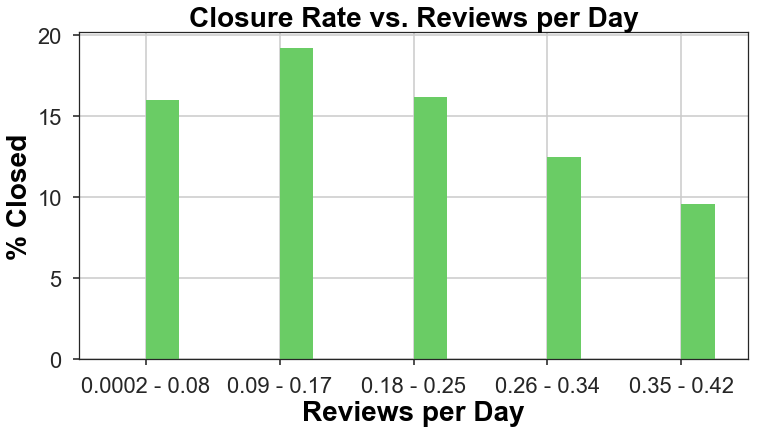

In [29]:
rpd_pcts = rpd_pcts[rpd_pcts['is_open'] == 0]
plt = rpd_pcts.plot(kind='bar', legend=False, figsize=(12,6))
labels = ["0.0002 - 0.08", "0.09 - 0.17", "0.18 - 0.25", "0.26 - 0.34", "0.35 - 0.42"]
plt.set_xticklabels(labels, rotation=0)
plt.set_xlabel("Reviews per Day")
plt.set_ylabel("% Closed")
plt.set_title("Closure Rate vs. Reviews per Day")

A similar trend can be seen in the graph below, where average ratings become higher the more frequently a business is reviewed.

[Text(0,0,'0.0002 - 0.08'),
 Text(0,0,'0.09 - 0.17'),
 Text(0,0,'0.18 - 0.25'),
 Text(0,0,'0.26 - 0.34'),
 Text(0,0,'0.35 - 0.42')]

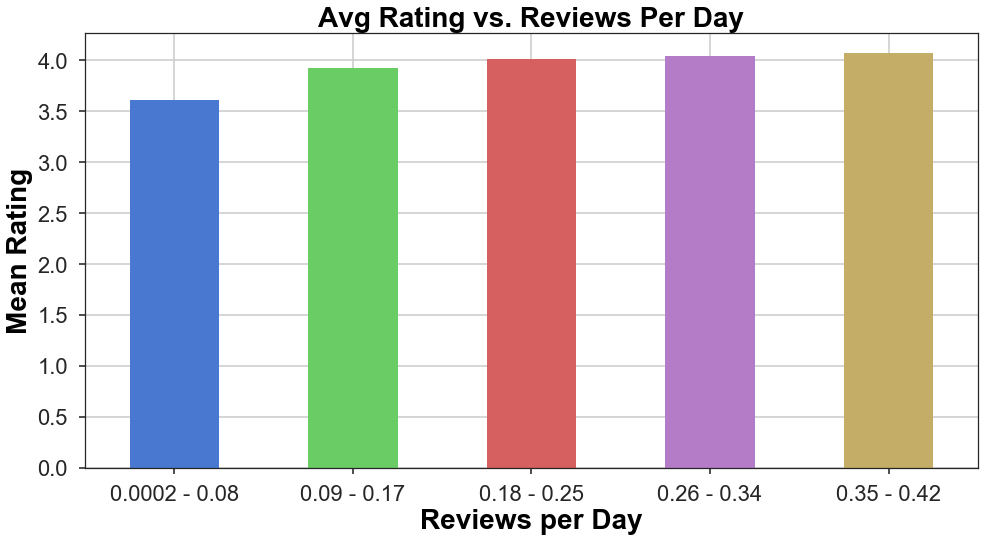

In [19]:
plt = rpdFrame.groupby('range')['stars'].mean().plot(kind='bar', figsize=(16,8))
plt.set_title("Avg Rating vs. Reviews Per Day")
plt.set_xlabel("Reviews per Day")
plt.set_ylabel("Mean Rating")
abels = ["0.0002 - 0.08", "0.09 - 0.17", "0.18 - 0.25", "0.26 - 0.34", "0.35 - 0.42"]
plt.set_xticklabels(labels, rotation=0)


- The more frequently a business is reviewed, the less likely it is to close
- The more frequently a business is reviewed, average ratings become higher

## How do ratings relate to probability of failure?

This graph shows that on the surface, open and closed businesses don't differ that much by average rating.

[Text(0,0,'Closed'), Text(0,0,'Open')]

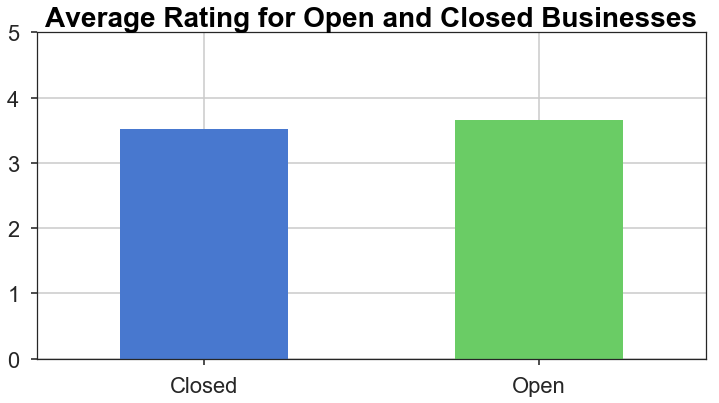

In [20]:
groups = df.groupby('is_open') #seperate open and closed

plt = groups['stars'].mean().plot(kind='bar', ylim=(0,5))
plt.set_title("Average Rating for Open and Closed Businesses")
labels = ['Closed', 'Open']
plt.set_xlabel('')
plt.set_xticklabels(labels, rotation=0)

Upon analysing how many businesses are open within each star group, we can see a trend. This table shows the % closed in each group, for example 10% of 1 star businesses are closed, meaning 90% are open.

In [21]:
pct_open = df.groupby(['stars', 'is_open']).agg({'business_id': 'size'})
pcts = pct_open.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
openstarsDF = pcts.reset_index()
openstarsDF = openstarsDF.set_index('stars')
closedStarsDF = openstarsDF[openstarsDF['is_open'] == 0]
closedStarsDF

,is_open,business_id
stars,,
1.0,0,10.850053
1.5,0,14.478271
2.0,0,15.214592
2.5,0,17.698786
3.0,0,20.836574
3.5,0,18.961858
4.0,0,17.201123
4.5,0,13.687692
5.0,0,9.088598


We can see an interesting trend here;
Unsuprisingly, 5 star businesses close the least. However, 1 star businesses close just as frequently. 3 stars seems to be the most 'dangerous' rating as 1/5th of those have closed down.

Text(0.5,1,'% Closed by Rating')

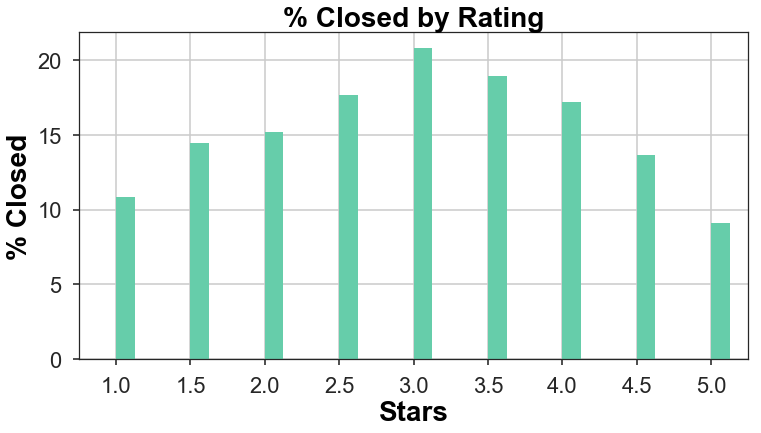

In [30]:
plt = closedStarsDF.plot(kind='bar', legend=False, figsize=(12,6), color='mediumaquamarine')
labels = [1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0]
plt.set_xticklabels(labels,rotation=0)
plt.set_ylabel('% Closed')
plt.set_xlabel('Stars')
plt.set_title("% Closed by Rating")


- A business has less chance of closing while holding 1 or 5 stars
- A business has the highest chance of closing when it holds 3 stars.

## How do ratings relate to the lifespan of a business?

To take a closer look at those closed businesses from each star group above, this part takes a look at the lifespans of each star rating in the closed group. 1 and 5 star close the least often, so how long did those closed businesses last?

In [23]:
closedAnalysis = revInfo[revInfo['is_open'] == 0] #choose just the closed businesses from teh lifespan table
closedAnalysis.head()

,name,stars,city,state,postal_code,review_count,is_open,lastReview,firstReview,lifespan,rpd,range
--U98MNlDym2cLn36BBPgQ,"""Pronto Pizza""",3.0,Indian Trail,NC,28079,4,0,2012-11-16,2010-04-26,935,0.004278,"(-0.00956, 0.41]"
--g-a85VwrdZJNf0R95GcQ,"""Kabab House""",4.5,Phoenix,AZ,85032,24,0,2014-09-13,2013-11-14,303,0.079208,"(-0.00956, 0.41]"
--g8DrU2SDtAH615TFC0dQ,"""Maibach's Home Furnishings""",3.5,Medina,OH,44256,3,0,2016-03-16,2013-11-13,854,0.003513,"(-0.00956, 0.41]"
--lpHMVmkCuji0ZrpHtXEA,"""SkinRN""",5.0,Henderson,NV,89052,3,0,2015-05-21,2014-07-08,317,0.009464,"(-0.00956, 0.41]"
--q7kSBRb0vWC8lSkXFByA,"""Double Play Sports Bar""",4.0,Las Vegas,NV,89123,7,0,2012-06-07,2008-04-17,1512,0.004630,"(-0.00956, 0.41]"


Here, we can see that 1 and 5 star businesses last the shortest amount of time.

Text(0.5,0,'Stars')

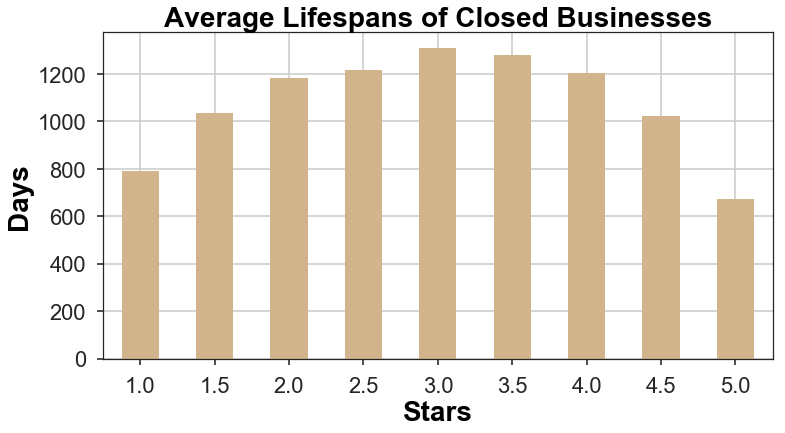

In [31]:
stars = closedAnalysis.groupby('stars')

plt = stars.mean().plot(kind='bar', y ='lifespan',legend=False, figsize=(12,6), color='tan')
plt.set_title("Average Lifespans of Closed Businesses")
labels = [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
plt.set_xticklabels(labels,rotation=0)
plt.set_ylabel('Days')
plt.set_xlabel('Stars')


- The small percentage of businesses that close in the 1 and 5 star categories tend to close the fastest.
- 3 star businesses survive the longest before they close